In [1]:
import csv
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
df = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/DATASET/CosciaRios2012_DataBase.csv')
df.drop('Code', axis=1, inplace=True)
df

,State,Year,Beltran_Leyva,Beltran_Leyva_Family,Familia,Golfo,Juarez,Sinaloa,Sinaloa_Family,Tijuana,Zetas,Otros
0,1,1990,0,0,0,0,0,0,0,0,0,0
1,1,1991,0,0,0,0,0,0,0,0,0,0
2,1,1992,0,0,0,0,0,0,0,0,0,0
3,1,1993,0,0,0,0,0,0,0,0,0,0
4,1,1994,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
51591,32,2005,0,0,0,0,0,0,0,0,0,0
51592,32,2006,0,0,0,0,0,0,0,0,0,0
51593,32,2007,0,0,0,0,0,0,0,0,0,0
51594,32,2008,0,0,0,0,0,0,0,0,0,0


In [3]:
df = df.groupby(['State','Year']).sum()
df.to_csv('dataset.csv')

In [4]:
df = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/dataset.csv')
df_9000 = df[df.Year < 2000]
df_0010 = df[df.Year >= 2000 ]

In [15]:
cartelli = ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 
            'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']

lista2 = []
for state in df.State.unique():
    sub1 = df[df.State == state]

    for year in sub1.Year:
        sub2 = sub1[sub1.Year == year]
        
        for single in cartelli:
            value = sub2[single].iloc[0]
            lista1 = []
            if value > 0 :
                lista1.append(state)
                lista1.append(year)
                lista1.append(single)
                lista1.append(value)
                lista2.append(lista1)
                

file = open("Drug_Cartel_Network.txt", "w+")
file.write('State'+',')
file.write('Year'+',')
file.write('Drug_Cartel'+',')
file.write('Weight'+'\n')

for list in lista2:
    time = 0
    for element in list:
        time = time + 1
        e = str(element)
        file.write(e)
        if time < 4:
            file.write(',')
        else:
            file.write('\n')

file.close()        

In [7]:
df = df_9000

potenza cartelli generale negli annni divisi per stati

In [6]:
cartelli = ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 
            'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']

lista_state_year = []
for state in df.State.unique():
    sub1 = df[df.State == state]

    for year in sub1.Year:
        sub2 = sub1[sub1.Year == year]
        
        for single in cartelli:
            value = sub2[single].iloc[0]
            lista = []
            if value > 0 :
                year_ = str(year)
                _state = str(state)
                year_state = str(year_ + '_' + _state)
                
                lista.append(str(state))
                lista.append(year_state)
                lista.append(1)
                lista_state_year.append(lista)

file = open("Year_State_Network.txt", "w+")
file.write('A'+',')
file.write('B'+',')
file.write('Weight'+'\n')

for list in lista_state_year:
    time = 0
    for element in list:
        time = time + 1
        e = str(element)
        file.write(e)
        if time < 3:
            file.write(',')
        else:
            file.write('\n')

file.close()        

        

In [7]:
cartelli = ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 
            'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']

lista2 = []
for state in df.State.unique():
    sub1 = df[df.State == state]

    for year in sub1.Year:
        sub2 = sub1[sub1.Year == year]
        
        for single in cartelli:
            value = sub2[single].iloc[0]
            lista1 = []
            if value > 0 :
                year_ = str(year)
                _state = str(state)
                year_state = str(year_ + '_' + _state)
                
                lista1.append(year_state)
                lista1.append(single)
                lista1.append(int(value))
                lista2.append(lista1)
                

file = open("Year_Cartel_Network.txt", "w+")
file.write('A'+',')
file.write('B'+',')
file.write('Weight'+'\n')

for list in lista2:
    time = 0
    for element in list:
        time = time + 1
        e = str(element)
        file.write(e)
        if time < 3:
            file.write(',')
        else:
            file.write('\n')

file.close()

In [8]:
df_y_s = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/Year_State_Network.txt')
df_y_s.A = df_y_s['A'].astype(str)
df_y_c = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/Year_Cartel_Network.txt')
df = pd.concat([df_y_s, df_y_c], ignore_index=True, sort=False)


In [60]:
df

,A,B,Weight
0,1,2006_1,1
1,1,2006_1,1
2,1,2006_1,1
3,1,2006_1,1
4,1,2007_1,1
...,...,...,...
1887,2010_32,Golfo,13
1888,2010_32,Juarez,1
1889,2010_32,Sinaloa,5
1890,2010_32,Sinaloa_Family,1


In [9]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
got_net.barnes_hut()
got_data = df

sources = got_data['A']
targets = got_data['B']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src, color='#3da831')
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

got_net.repulsion(node_distance=80, spring_length=80)


# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show_buttons(filter_=True)
got_net.show('cartelli_in_90_00.html')

#--------------------------------

In [8]:
df.columns

Index(['State', 'Year', 'Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia',
       'Golfo', 'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas',
       'Otros'],
      dtype='object')

In [9]:

df_FMF = df[['State', 'Year', 'Zetas']]
df_FMF[df_FMF.Zetas > 0]

,State,Year,Zetas
23,2,1992,1
24,2,1993,1
25,2,1994,1
30,2,1999,1
134,7,1998,2
172,9,1994,1
214,11,1994,4
298,15,1994,1
300,15,1996,1
303,15,1999,1


In [27]:
cartelli = ['Zetas']

lista_FMF = []
for state in df_FMF.State.unique():
    sub1 = df_FMF[df_FMF.State == state]
    for year in sub1.Year:
        sub2 = sub1[sub1.Year == year]
        
        for single in cartelli:
            value = sub2[single].iloc[0]
            lista = []
            
            if value > 0 :
                
                lista.append(str(state))
                lista.append(year)
                lista.append(1)
                lista_FMF.append(lista)

file = open("FMF_Network.txt", "w+")
file.write('A'+',')
file.write('B'+',')
file.write('Weight'+'\n')

for list in lista_FMF:
    time = 0
    for element in list:
        time = time + 1
        e = str(element)
        file.write(e)
        if time < 3:
            file.write(',')
        else:
            file.write('\n')

file.close()            

In [28]:
cartelli = ['Zetas']

lista2 = []
for state in df_FMF.State.unique():
    sub1 = df_FMF[df_FMF.State == state]

    for year in sub1.Year:
        sub2 = sub1[sub1.Year == year]
        
        for single in cartelli:
            value = sub2[single].iloc[0]
            lista1 = []
            if value > 0 :
                
                
                lista1.append(year)
                lista1.append(single)
                lista1.append(int(value))
                lista2.append(lista1)
                

file = open("FMF_Network2.txt", "w+")
file.write('A'+',')
file.write('B'+',')
file.write('Weight'+'\n')

for list in lista2:
    time = 0
    for element in list:
        time = time + 1
        e = str(element)
        file.write(e)
        if time < 3:
            file.write(',')
        else:
            file.write('\n')

file.close()

In [44]:
df_1 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/FMF_Network.txt')
df_1.A = df_1['A'].astype(str)
df_1.B = df_1['B'].astype(str)
df_2 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/FMF_Network2.txt')
df_2.A = df_2['A'].astype(str)
df = pd.concat([df_1, df_2], ignore_index=True, sort=False)
df

,A,B,Weight
0,2,1992,1
1,2,1993,1
2,2,1994,1
3,2,1999,1
4,7,1998,1
5,9,1994,1
6,11,1994,1
7,15,1994,1
8,15,1996,1
9,15,1999,1


In [38]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       22 non-null     object
 1   B       22 non-null     object
 2   Weight  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [43]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
got_net.barnes_hut()
got_data = df

sources = got_data['A']
targets = got_data['B']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

got_net.repulsion(node_distance=80, spring_length=80)


# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

#got_net.show_buttons(filter_=['physics'])
got_net.show_buttons(filter_=True)
got_net.show('FMF_zetas.html')

#--------------------------------

In [2]:
from pyvis.network import Network

In [43]:
df_test = df[df.State == 1]
#df_test = df_test.drop('State', axis=1)
df_test['Year'] = df_test['Year'].astype(object).astype(str)

/var/folders/hc/x07yzv917qgbjlbm0_4pdrjr0000gn/T/ipykernel_4867/237829368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Year'] = df_test['Year'].astype(object).astype(str)


In [47]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(10)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network('500px', '500px')
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.show('nx.html')

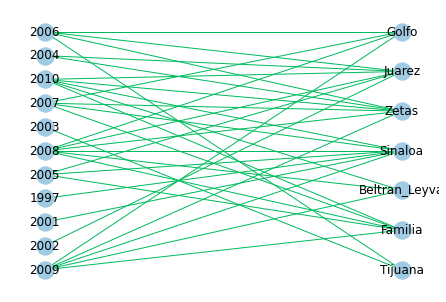

In [57]:


edges = [tuple(x) for x in df_test[['Year','Drug_Cartel']].values.tolist()]
B = nx.Graph()
B.add_nodes_from(df_test['Year'].unique(), bipartite=0, label='user')
B.add_nodes_from(df_test['Drug_Cartel'].unique(), bipartite=1, label='item')
B.add_edges_from(edges, label='rating')

# Now instead of spring_layout, use bipartite_layout

# First specify the nodes you want on left or top
left_or_top = df_test['Year'].unique()

# Then create a bipartite layout
pos = nx.bipartite_layout(B, left_or_top)

# Pass that layout to nx.draw
nx.draw(B,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,
     edge_cmap=plt.cm.Blues,with_labels=True)

g=Network()
g.from_nx(B)
g.show("networkx.html")


In [22]:
got_data = pd.read_csv('https://www.macalester.edu/~abeverid/data/stormofswords.csv')

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        33 non-null     int64 
 1   Year         33 non-null     object
 2   Drug_Cartel  33 non-null     object
 3   Weight       33 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


In [62]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
got_net.barnes_hut()
got_data = df

sources = got_data['A']
targets = got_data['B']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src, color='#3da831')
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

got_net.repulsion(node_distance=80, spring_length=80)


# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show_buttons(filter_=True)
got_net.show('gg.html')


